<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-saved-data" data-toc-modified-id="Load-saved-data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Load saved data</a></span></li><li><span><a href="#Load-raw-data" data-toc-modified-id="Load-raw-data-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Load raw data</a></span></li></ul></li></ul></li><li><span><a href="#Plot-graphs" data-toc-modified-id="Plot-graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot graphs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Interface-height-and-width" data-toc-modified-id="Interface-height-and-width-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Interface height and width</a></span></li><li><span><a href="#Calculate-and-plot-roughness" data-toc-modified-id="Calculate-and-plot-roughness-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Calculate and plot roughness</a></span></li><li><span><a href="#Linear-regression-on-log-log-transformed-data" data-toc-modified-id="Linear-regression-on-log-log-transformed-data-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Linear regression on log-log transformed data</a></span><ul class="toc-item"><li><span><a href="#Roughness-time-dependence" data-toc-modified-id="Roughness-time-dependence-2.0.3.1"><span class="toc-item-num">2.0.3.1&nbsp;&nbsp;</span>Roughness time dependence</a></span></li><li><span><a href="#Statsmodels-example-for-reference" data-toc-modified-id="Statsmodels-example-for-reference-2.0.3.2"><span class="toc-item-num">2.0.3.2&nbsp;&nbsp;</span>Statsmodels example for reference</a></span></li></ul></li><li><span><a href="#Fit-power-law-using-scipy-leastsq-on-non-transformed-data" data-toc-modified-id="Fit-power-law-using-scipy-leastsq-on-non-transformed-data-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Fit power law using scipy leastsq on non-transformed data</a></span></li><li><span><a href="#Maximum-likelihood-estimate-fitting" data-toc-modified-id="Maximum-likelihood-estimate-fitting-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Maximum likelihood estimate fitting</a></span></li></ul></li></ul></li></ul></div>

Plot the roughness of the interface for all data sets together

# Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import seaborn as sns
cwd = os.getcwd(); print("Working dir: " + cwd)
folder_figures = "/Users/dang/Documents/Projects/Tabler_skull/Figures/"
im_label = ""

Working dir: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Scripts_python


In [2]:
save_folder_figures = '/Users/dang/Documents/Projects/Tabler_skull/Figures/temp'

plt.rcParams["font.size"] = "16"

# For using LateX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})


In [3]:
N_videos = 4

### Load saved data

In [36]:
?sns.boxplot

In [26]:
folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/roughness/"
roughness_df = pd.read_csv(os.path.join(folder, 'roughness_data_all_videos.csv'))
roughness_df

,Unnamed: 0,t,Video,alpha,hours,SE
0,0,0,Video 0,0.466475,0.000000,0.044602
1,1,0,Video 1,0.457737,0.000000,0.044325
2,2,0,Video 2,0.487166,0.000000,0.042124
3,3,0,Video 3,0.467218,0.000000,0.043326
4,4,1,Video 0,0.506323,0.166667,0.046549
...,...,...,...,...,...,...
287,287,71,Video 3,0.461534,11.833333,0.042818
288,288,72,Video 0,0.476707,12.000000,0.046341
289,289,72,Video 1,0.443999,12.000000,0.044735
290,290,72,Video 2,0.455935,12.000000,0.027624


In [40]:
# pool all data together
roughness_df['alpha'].std()

0.026696330505623

In [52]:
# avg over experiments first
np.mean([roughness_df.loc[roughness_df['Video']=='Video 1']['alpha'].std(),
 roughness_df.loc[roughness_df['Video']=='Video 2']['alpha'].std(),
 roughness_df.loc[roughness_df['Video']=='Video 3']['alpha'].std(),
 roughness_df.loc[roughness_df['Video']=='Video 0']['alpha'].std()
])

0.025336437936874505

In [35]:
# SEM
roughness_df['alpha'].std()/np.sqrt( roughness_df['alpha'].shape[0] )

0.0015622845741525863

In [46]:
?pd.DataFrame.std

### Load raw data

In [4]:
# Interface height and width
# NB this data is already  normalized 
load_folder_1 = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Analyzed_height_vs_t/"
#load_folder_1 = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Analyzed_height_vs_t/Otsu/"

# template filenames
fname_1 = "Video_{}_{}_interface_h_w_method_{}.csv";
dates_all = ["190305", "190314", "200120", "170902"];
pix_per_micron_all = [4.400, 5.1040, 5.1040, 4.4034]; # convert pixels to microns

#N_videos = len(dates_all);
methods_to_plot = range(3);
normalize_height = [1]; # methods for which height needs to be normalized (h(t) - h(0)) [NB Python indexing]

data_bulk_all = pd.DataFrame([])
t_max_bulk_all = [[None, None, None] for _ in range(N_videos)]
idx_method = 0;

for idx_video in range( N_videos ):
    date = dates_all[idx_video];
    loaded_data = pd.read_csv(load_folder_1 + fname_1.format(idx_video+1, date, idx_method+1), index_col=0);
    
    loaded_data['experiment'] = date
    loaded_data['interface_height'] = loaded_data['interface_height'] - loaded_data['interface_height'].iloc[0]
    #loaded_data['time'] = loaded_data.index/6
    
    print( max(loaded_data['time']) )
    data_bulk_all = data_bulk_all.append(loaded_data) 


12.0
16.166666666666668
12.0
13.833333333333336


In [5]:
data_bulk_all

,time,interface_height,interface_width,experiment
0,0.000000,0.000000,40.299533,190305
1,0.166667,4.544052,22.647578,190305
2,0.333333,-4.797860,39.220570,190305
3,0.500000,2.946671,24.071212,190305
4,0.666667,11.317362,29.764940,190305
...,...,...,...,...
79,13.166667,222.459060,36.951317,170902
80,13.333333,224.221763,37.782152,170902
81,13.500000,225.539959,39.403277,170902
82,13.666667,226.962493,37.411048,170902


In [6]:
# Full interfaces
# NB not normalized data
#load_folder = '/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Interface_data_all/Otsu/'
# csv_label = '_Otsu'
csv_label=''

load_folder = '/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Interface_data_all/'
im_label_all = ["190305_MaxProjected_Stitched_dataset(0-12hr)_YD", 
                "MaxProjected_Stitched_190314_ML1_OsxGFP_Explant_Video_1_(0-16hr)",
                "MaxProjected_Stitched_200120_Live_Imaging_OsxGFP_E1375_12_hours",
               "MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging"];
size_px_all = np.array([[3782, 2882], [5612, 2850], [4734, 3925], [4643, 2886]]);
pix_per_micron_all = [4.400, 5.1040, 5.1040, 4.4034];
lower_all = [50, 50, 700, 50] # bounds for filtering interfaces 
upper_all = [-200, -200, -150, -150]

interfaces_all = [None for _ in range(N_videos)];
tmax_all = [None for _ in range(N_videos)];

# video_idx = 3;
for video_idx in range(N_videos):
    im_label = im_label_all[video_idx];
    pix_per_micron = pix_per_micron_all[video_idx];
    lower=lower_all[video_idx]
    upper=upper_all[video_idx]
    interfaces_df = pd.read_csv(load_folder + im_label + "_interfaces_data_processed" + csv_label + ".csv", index_col=0)
    interfaces_0 = np.array(interfaces_df); # unprocessed interface data
    tmax_all[video_idx] = interfaces_0.shape[0]; # plot entire movie
    
    interfaces_all[video_idx] = interfaces_0[:, lower:upper]/pix_per_micron;

In [7]:
tmax_all = [37, 37, 37, 37]

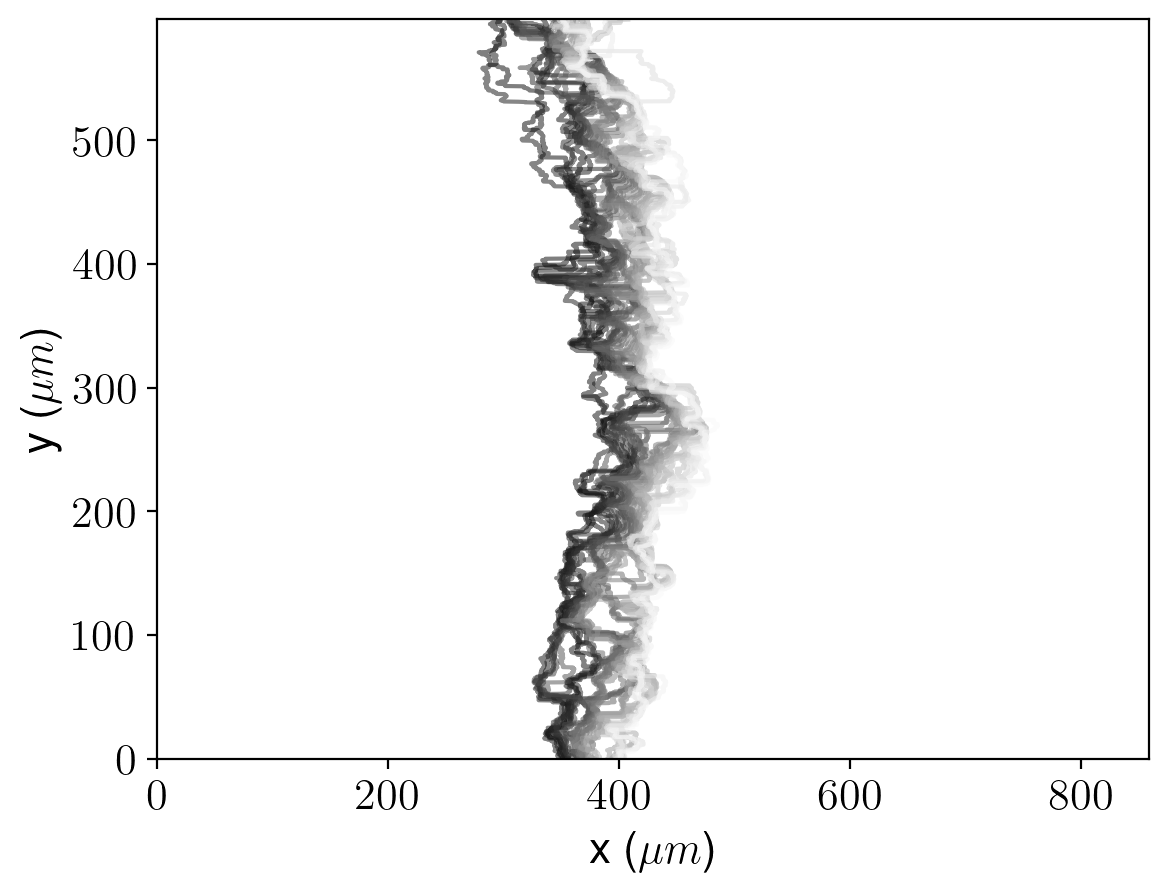

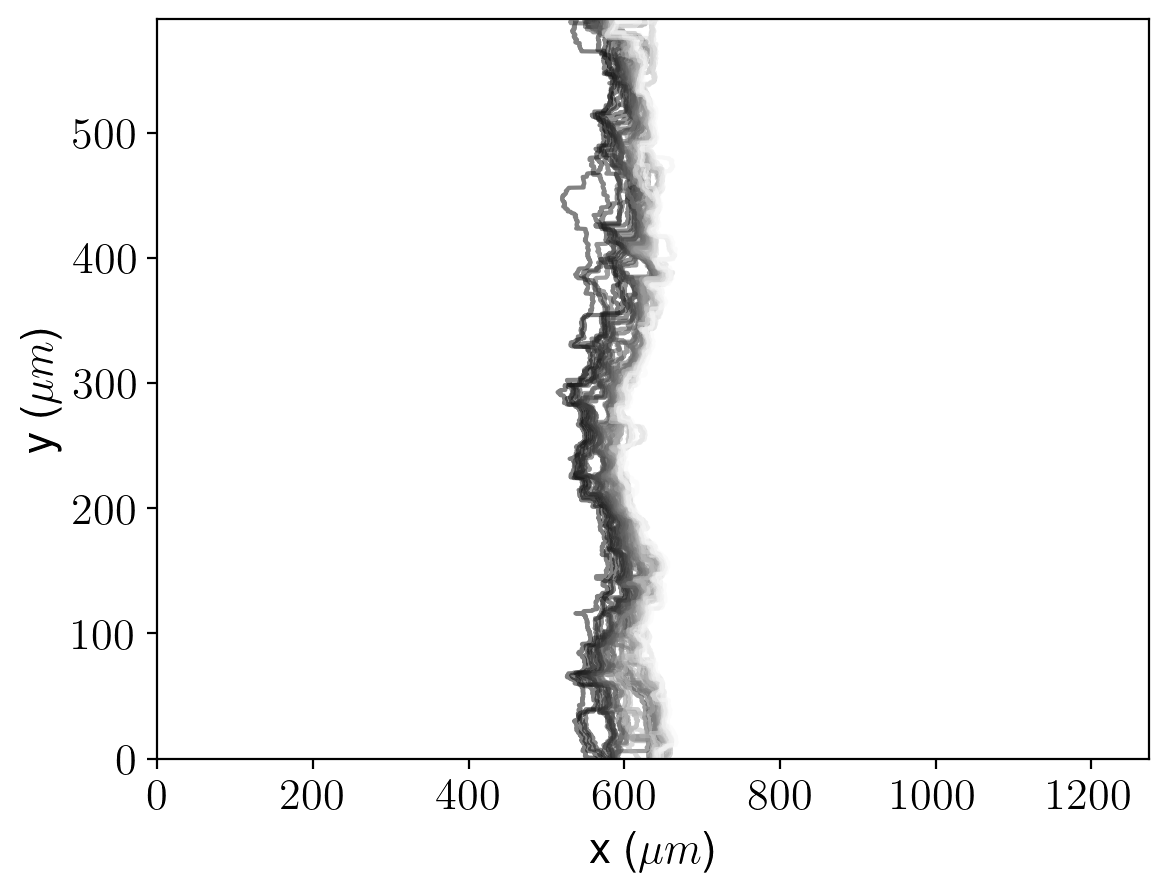

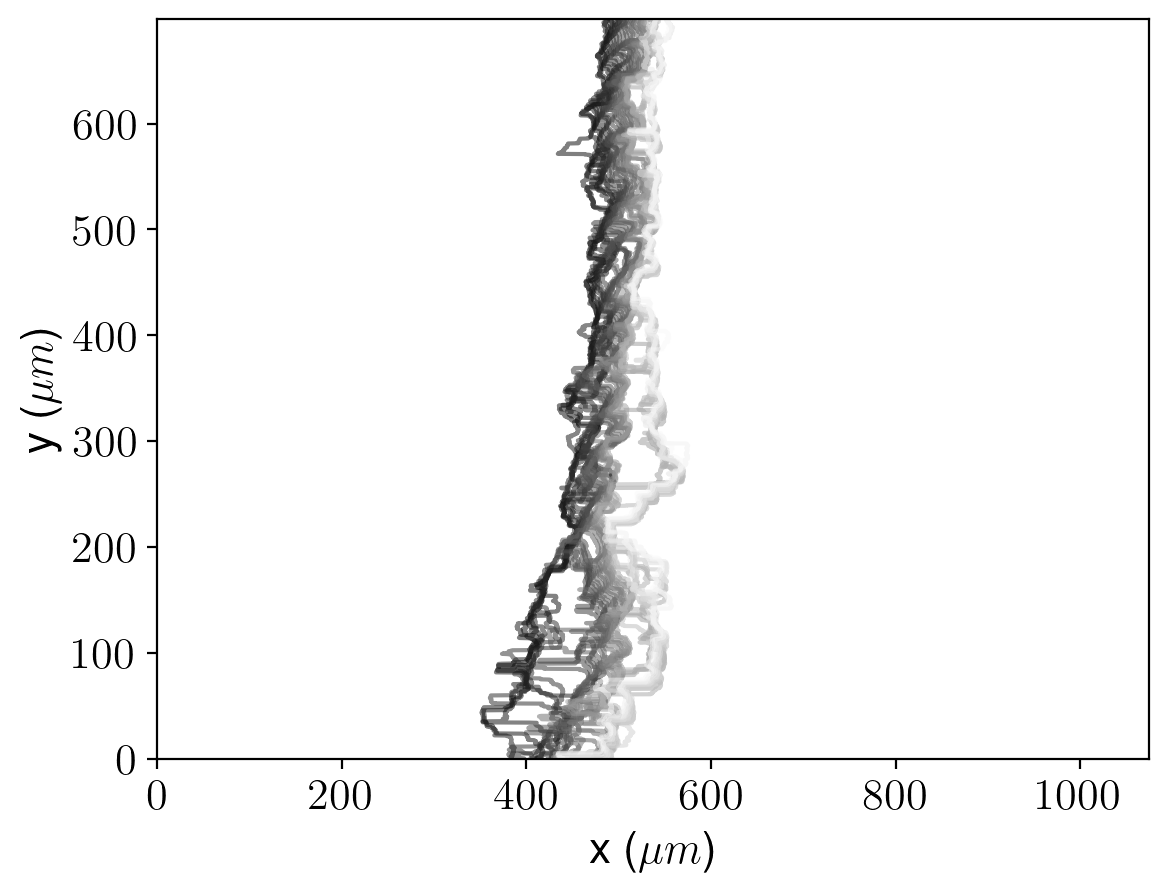

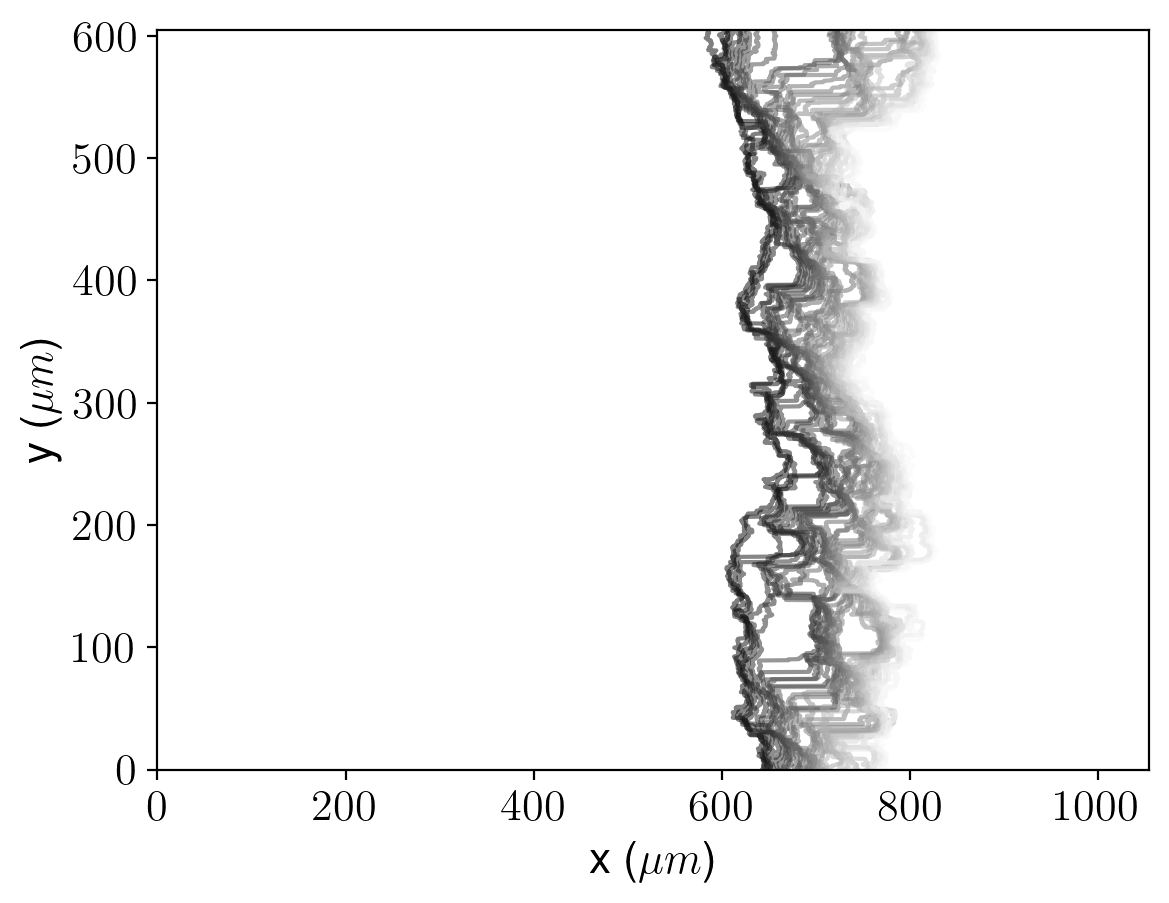

In [8]:
# Check loaded data by plotting interfaces
#video_idx = 1

for video_idx in range(0, N_videos):
    # fig dimensions
    Lx = size_px_all[video_idx][0];
    Ly = interfaces_all[video_idx].shape[1];  

    # if video_idx==3:
    #     Ly = 2861; # video 4 (170902): pre-processed interface, Ly = 2861;
    # else:
    #     Ly = size_px[1];  

    # Plot fig
    y_vals = np.arange( Ly )/pix_per_micron;
    t_max = tmax_all[video_idx]
    h = plt.figure(dpi=200);
    for idx in np.arange(t_max):
        #plt.plot(interfaces_all[video_idx][idx,:], y_vals, color=[idx/t_max, idx/t_max, idx/t_max, 0.5] ); # in microns
        plt.plot(interfaces_all[video_idx][idx,:], y_vals, color=[idx/t_max, idx/t_max, idx/t_max, 0.5] ); # in microns

    plt.xlabel('x ($\mu m$)')
    plt.ylabel('y ($\mu m$)')
    plt.xlim(0, Lx/pix_per_micron)
    plt.ylim(0, Ly/pix_per_micron)

    #plt.savefig( os.path.join(save_folder_figures, 'Interface_profiles_all_y_Video_'+str(video_idx+1)+'_grey_6hrs.pdf' ) )
    plt.show()

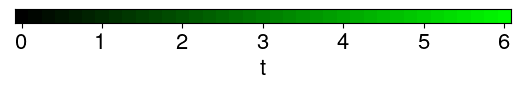

In [9]:
#manually make colorbar
colors_all = np.array([[[0, t/t_max, 0] for t in range(t_max)]]);
#colors_all = np.array([[[0, t/t_max, 0] for t in range(t_max)]]);
#colors_all = np.array([[[0, t/t_max, 0]] for t in range(t_max)]);

plt.figure(dpi=100)
plt.imshow(colors_all)
plt.xlabel('t')
plt.yticks([])
x_ticks = np.arange(0, t_max, 6);
t_selected = [0, 6, 12, 18, 24, 30, 36]
x_tick_labels = [str(int(t/6)) for t in t_selected];
plt.xticks(ticks=x_ticks, labels=x_tick_labels)

# Save colorbar
# plt.savefig( os.path.join(save_folder_figures,'colorbar_green_times.pdf') )

plt.show();

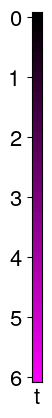

In [10]:
#colors_all = np.array([[[0, t/t_max, 0]] for t in range(t_max)]); # green
colors_all = np.array([[[t/t_max, 0, t/t_max]] for t in range(t_max)]); # magenta

plt.figure(dpi=100)
plt.imshow(colors_all)
plt.xlabel('t')
plt.xticks([])
ticks = np.arange(0, t_max, 6);
t_selected = [0, 6, 12, 18, 24, 30, 36]
y_tick_labels = [str(int(t/6)) for t in t_selected];
plt.yticks(ticks=ticks, labels=y_tick_labels)

# Save colorbar
# plt.savefig( os.path.join(save_folder_figures,'colorbar_magenta_times_vertical.pdf') )

plt.show();

# Plot graphs

### Interface height and width

In [78]:
# Filter so all movies have same length
max_t = 12;
filt = data_bulk_all['time']<=max_t
data_bulk_all = data_bulk_all[filt]

# adjust tmax_all
tmax_all = [int(max_t*6+1) for _ in range(N_videos)]
tmax_all

[73, 73, 73, 73]

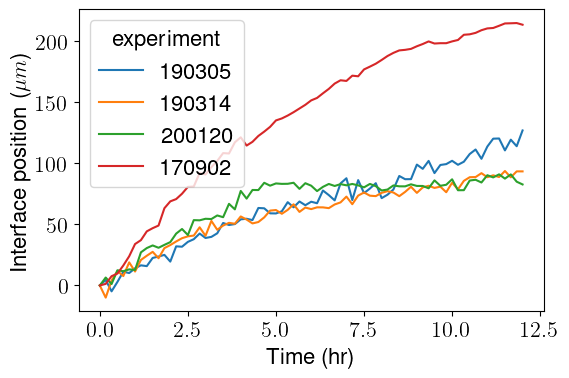

In [79]:
# Interface dynamics (all)
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
sns.lineplot(data=data_bulk_all, x='time', y='interface_height', hue='experiment', ax=ax)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Interface position ($\mu m$)')

# Save image
fname_out = folder_figures + im_label + "Interface_height_vs_time_all_combined";
#plt.savefig(fname_out + ".pdf")
# plt.savefig(fname_out + ".png")

plt.show()

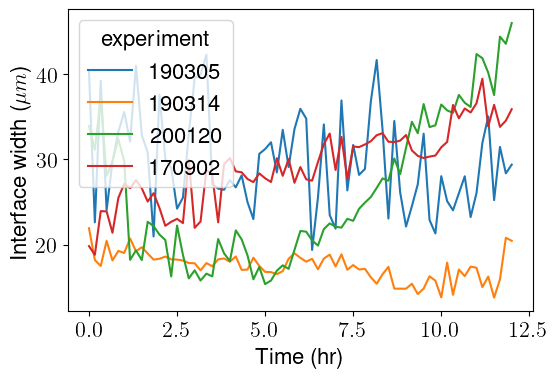

In [80]:
# Interface width (all)
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
sns.lineplot(data=data_bulk_all, x='time', y='interface_width', hue='experiment', ax=ax)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Interface width ($\mu m$)')

# Save image
fname_out = folder_figures + im_label + "Interface_width_vs_time_all_combined";
#plt.savefig(fname_out + ".pdf")

plt.show()

### Calculate and plot roughness

In [11]:
interfaces_all[3].shape

(84, 2661)

In [12]:
# Calculate structure factor
from numpy import fft
S_all = [None for _ in range(N_videos)];

video_idx = 0;

t_max = tmax_all[video_idx]

k_min_all = [10, 10, 10, 10]
k_max_all = [10**3, 10**3, 10**3, 10**3]

for video_idx in range(N_videos):
    
    interface_all_t = interfaces_all[video_idx];
    this_S_all_t = np.zeros( interface_all_t.shape );
    for t in np.arange(t_max):    
        interface = interface_all_t[t]; 
        h_all = interface[~np.isnan(interface)]; # filter out nan
        this_S = np.real(fft.fft(h_all)*fft.ifft(h_all)); # h(-k) obtained from inverse FFT
        this_S_all_t[t, :] = this_S;
    S_all[video_idx] = this_S_all_t;

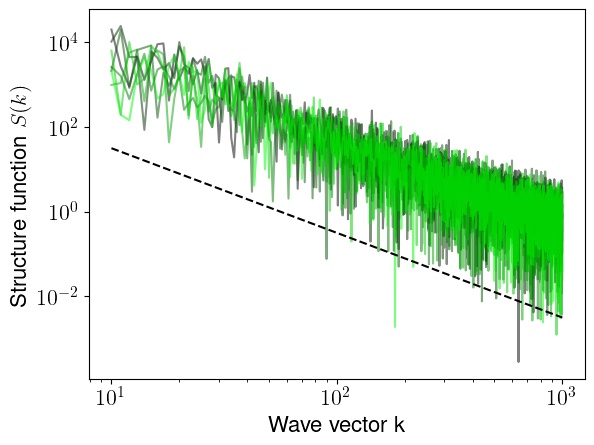

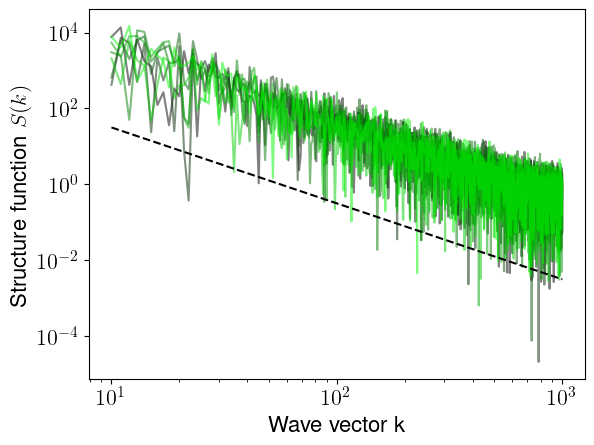

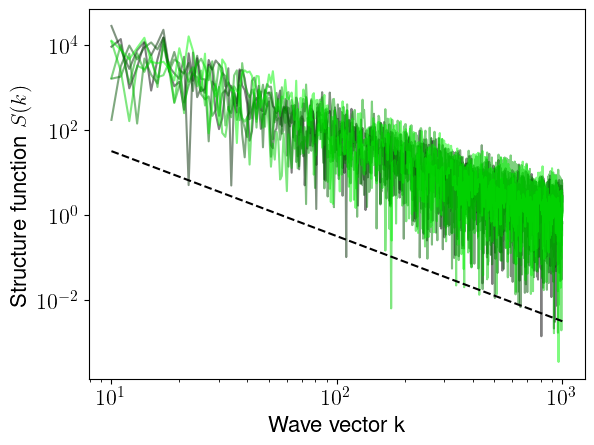

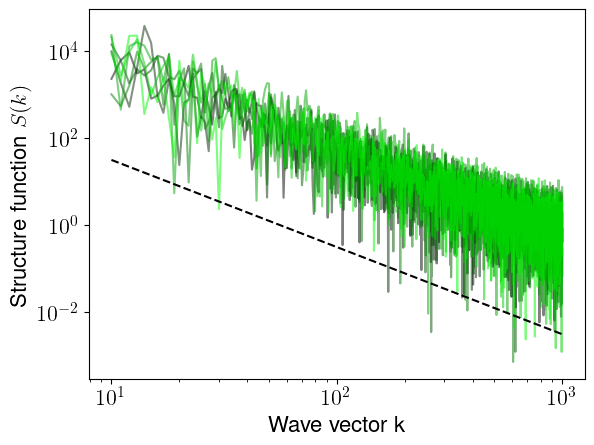

In [13]:
# Plot a single video to check
#video_idx = 1;

for video_idx in range(N_videos):
    this_S_all_t = S_all[video_idx]
    t_max = tmax_all[video_idx]
    t_selected = np.arange(0, t_max, 6);
    kmin=k_min_all[video_idx]
    kmax=k_max_all[video_idx]

    plt.figure(dpi=100)
    for idx in np.arange(len(t_selected)):    
        t = t_selected[idx];
        #plt.plot( this_S_all_t[t, :], color=[0, t/t_max, 0, 0.5] )  
        plt.plot(np.arange(kmin, kmax), this_S_all_t[t, kmin:kmax], color=[0, t/t_max, 0, 0.5] )  
        
    # Plot power laws 
    k_range = 10**np.arange(1, 3.1);
    alpha_plot = 0.5;
    exponent = -(2*alpha_plot+1);
    c = (10**3.5)
    S_range = c*k_range**exponent;
    plt.plot(k_range, S_range, 'k--')
    # plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
    # plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Wave vector k')
    plt.ylabel('Structure function $S(k)$')
    #plt.legend()

    #plt.savefig( os.path.join(save_folder_figures, 'Interface_structure_function_Video_'+str(video_idx+1)+'_alpha_0p5_line.pdf' ) )

    plt.show()

In [14]:
# Bin data 
def bin_data(data, binsize):
    # bins the data, adds cells to the last bin to match size and then take avg over each bin
    
    nbins = int(np.ceil(data.shape[0]/binsize));
    value_impute = np.mean( data[ binsize*(nbins-1): ]  ) # fill extra bins with value_impute
    n_add = binsize*(nbins) - data.shape[0]; # number of elements to add 

    if n_add>0:    
        data = np.concatenate((data, value_impute*np.ones(n_add)))

    return list(map(np.mean, data.reshape([nbins, binsize]) ))


In [15]:
t_selected = np.arange(0, 37, 1)
t_selected


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

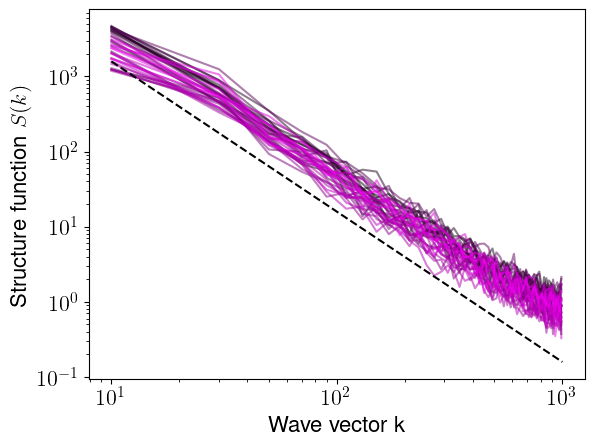

In [16]:
# Plot binned data
#video_idx = 1;
binsize = 20;

for video_idx in range(1): #range(N_videos):
    this_S_all_t = S_all[video_idx]
    t_max = tmax_all[video_idx]
    #t_selected = np.arange(0, t_max, 6);
    kmin=k_min_all[video_idx]
    kmax=k_max_all[video_idx]
    
    plt.figure(dpi=100)
    for idx in np.arange(len(t_selected)):    
        t = t_selected[idx];
        
        xdata_plot = (np.arange(kmin/binsize, kmax/binsize)*binsize);
        ydata_plot = bin_data( this_S_all_t[t, kmin:kmax] , binsize )
        
        #plt.plot( this_S_all_t[t, :], color=[0, t/t_max, 0, 0.5] )  
        #plt.plot(xdata_plot, ydata_plot, color=[0, t/t_max, 0, 0.5] )  
        plt.plot(xdata_plot, ydata_plot, color=[t/t_max, 0, t/t_max, 0.5] )  
        
    # Plot power laws 
    k_range = 10**np.arange(1, 3.1);
    alpha_plot = 0.5;
    exponent = -(2*alpha_plot+1);
    c = (10**5.2)
    S_range = c*k_range**exponent;
    plt.plot(k_range, S_range, 'k--')
    # plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
    # plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Wave vector k')
    plt.ylabel('Structure function $S(k)$')
    #plt.legend()

    #plt.savefig( os.path.join(save_folder_figures, 'Interface_structure_function_Video_'+
    #                         str(video_idx+1)+'_alpha_0p5_binsize_'+str(binsize)+'_line_magenta_t_6hrs.pdf' ) )
    plt.show()

### Linear regression on log-log transformed data
Not recommended, but still quick fix

In [17]:
# Single maximum time
tmax_glob = min(tmax_all)

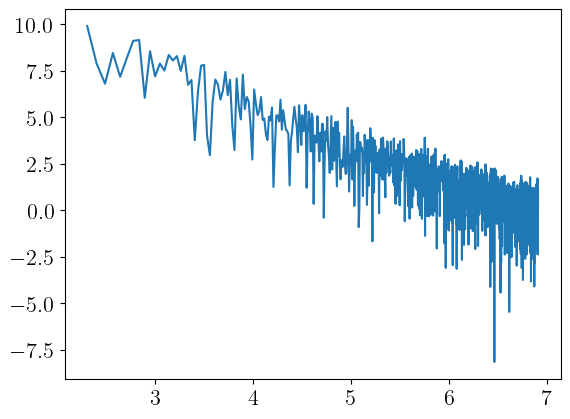

In [18]:
# data to fit
video_idx = 0;
this_S_all_t = S_all[video_idx]
kmin = 10;
kmax = 1000
t = 0;
data_fit = this_S_all_t[t, kmin:kmax]

# data_fit
x_data = np.log( np.arange(kmin, kmax) );
y_data = np.log(data_fit);
plt.plot(x_data, y_data )


In [19]:
import statsmodels.api as sm
x_data = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data)
results = model.fit()
print('Fit parameters:', results.params )
print('Roughness = ', (-results.params[1]-1)/2 )# Recalculate alpha from fit 

Fit parameters: [12.83653552 -1.93295057]
Roughness =  0.46647528595858667


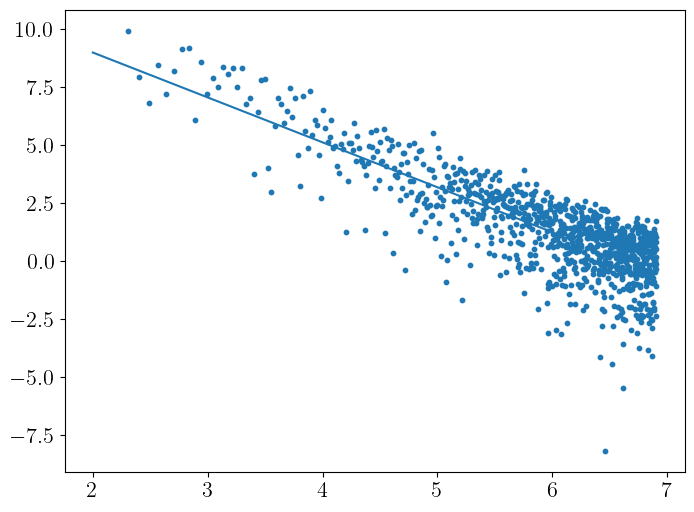

In [20]:
# Plot fit
x_fit = np.arange(2, 7);
y_fit = results.params[0] + results.params[1]*x_fit

plt.figure(figsize=(8, 6));
plt.plot(x_fit, y_fit)
plt.scatter(x_data[:, 1], y_data, s=10 )
plt.show()

In [21]:
video_idx=1
this_S_all_t = S_all[video_idx]
tmax = tmax_all[video_idx]

for t in range(tmax_glob):
    print(t)
    x_data = np.log( np.arange(kmin, kmax) );
    y_data = np.log( this_S_all_t[t, kmin:kmax] );
    x_data = sm.add_constant(x_data)
    model = sm.OLS(y_data,x_data)
    results = model.fit()
    print((-results.params[1]-1)/2)

0
0.4577366456394062
1
0.47900474155392214
2
0.4604832576320359
3
0.4630787425513091
4
0.468098311704748
5
0.41295483408485356
6
0.44600614544978545
7
0.4386355988527951
8
0.4971939831087978
9
0.4585606576087494
10
0.44667245970165403
11
0.4514928084950882
12
0.461826836609582
13
0.44755971914923365
14
0.49158795963975055
15
0.4561347662002635
16
0.4772787187457098
17
0.4786933431045852
18
0.4695080577805232
19
0.45665850145657116
20
0.4619702710273317
21
0.4506010298027523
22
0.46204742664010456
23
0.4488497801788962
24
0.5364757326771505
25
0.44379495994280127
26
0.4567476985431437
27
0.47044280089982493
28
0.4428344508805593
29
0.4605790523871557
30
0.44347526155972683
31
0.47700142483559216
32
0.4486556226019358
33
0.4699102405365251
34
0.47959887602066065
35
0.46340670749416524
36
0.4580568572344039


In [22]:
## Calculate for all images
params_fit_all = np.zeros((N_videos, tmax_glob, 2))
roughness_all = np.zeros((N_videos, tmax_glob))
std_errors_all = np.zeros((N_videos, tmax_glob))
# params_fit_all = [np.zeros((tmax, 2)) for tmax in tmax_all];
# roughness_all = [np.zeros(tmax) for tmax in tmax_all] # Convert to roughness values

kmin = 10;
kmax = 1000
    
for video_idx in range(N_videos):
    this_S_all_t = S_all[video_idx]
    tmax = tmax_all[video_idx]
    
    for t in range(tmax_glob):
        x_data = np.log( np.arange(kmin, kmax) );
        y_data = np.log( this_S_all_t[t, kmin:kmax] );
        x_data = sm.add_constant(x_data)
        model = sm.OLS(y_data,x_data)
        results = model.fit()
        
        params_fit_all[video_idx, t, :] = results.params
        roughness_all[video_idx, t] = (-results.params[1]-1)/2
        std_errors_all[video_idx, t] = results.bse[1]
        #params_fit_all[video_idx][t, :] = results.params
        #roughness_all[video_idx][t] = (-results.params[1]-1)/2


In [23]:
# (2D data)
df = pd.DataFrame([], columns=["Video "+str(i) for i in range(N_videos)])

for i in range(N_videos):
    df["Video "+str(i)] = roughness_all[i]

# tidy data
df=(df.stack()
 .rename_axis(index = ['t','Video'])
 .rename('alpha')
 .reset_index()
 #.reindex(columns = ['t','Video','alpha']))
)
df['hours'] = df['t']/6;
df

df2 = pd.DataFrame([], columns=["Video "+str(i) for i in range(N_videos)])
for i in range(N_videos):
    df2["Video "+str(i)] = std_errors_all[i]
    
# tidy data
df2=(df2.stack()
 .rename_axis(index = ['t','Video'])
 .rename('SE')
 .reset_index()
    )

df_all = pd.merge(df, df2)

In [97]:
#save_folder = "/Users/dang/Documents/Projects/Tabler_skull/Figures/Live_imaging/roughness/"
save_folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/roughness/"

df_all.to_csv( save_folder + 'roughness_data_all_videos.csv')

In [24]:
std_errors_all

array([[0.04460244, 0.04654912, 0.04188417, 0.04247945, 0.04709499,
        0.04579339, 0.04306789, 0.04454205, 0.04585568, 0.04662624,
        0.04612918, 0.04833408, 0.04439356, 0.04617887, 0.0444358 ,
        0.04269891, 0.0444634 , 0.04301341, 0.04346528, 0.04523499,
        0.04439758, 0.04518921, 0.04585449, 0.04566912, 0.04491152,
        0.045358  , 0.04486572, 0.04627576, 0.04604591, 0.04629215,
        0.04531756, 0.04313179, 0.0451237 , 0.04665406, 0.04580947,
        0.04615904, 0.04333363],
       [0.04432506, 0.04412729, 0.0430093 , 0.04457283, 0.04545397,
        0.04594131, 0.04669692, 0.04621558, 0.04736952, 0.04462613,
        0.04816519, 0.04527437, 0.04319965, 0.04409725, 0.04823614,
        0.04235414, 0.04228165, 0.04522916, 0.04430543, 0.04532057,
        0.04531478, 0.04305164, 0.04155718, 0.0470271 , 0.04277267,
        0.04124092, 0.04710615, 0.0444531 , 0.04213642, 0.04669544,
        0.04633082, 0.04489365, 0.04578874, 0.04671535, 0.04418786,
        0.04739

In [25]:
# calculate SEM for given video
df.loc[df['Video']=='Video 0'].sem()['alpha']

0.003412034420692679

In [26]:
# calculate average per video
df_means = df.groupby(['Video'])['alpha'].mean()

# average over videos and take SEM
print( df_means.mean() )
print( df_means.sem() )


0.4671475252544299
0.004188520022011608


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_21162/670647557.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


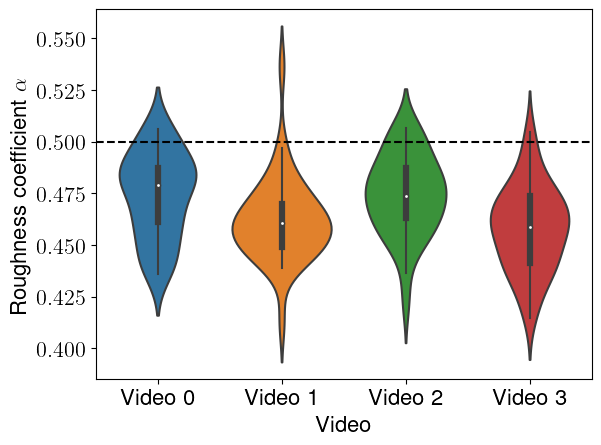

In [27]:
## Overall roughness (all times merged)
fig, ax = plt.subplots(dpi=100)
sns.violinplot(data=df, x="Video", y="alpha", ax=ax)
ax.plot([-0.5, 3.5], [0.5, 0.5], 'k--')
ax.set_xlim([-0.5, 3.5])
ax.set_ylabel("Roughness coefficient $\\alpha$")
#fig.savefig( os.path.join(save_folder_figures, 'Roughness_by_video_violin.pdf') )
fig.show()

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_21162/690008515.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


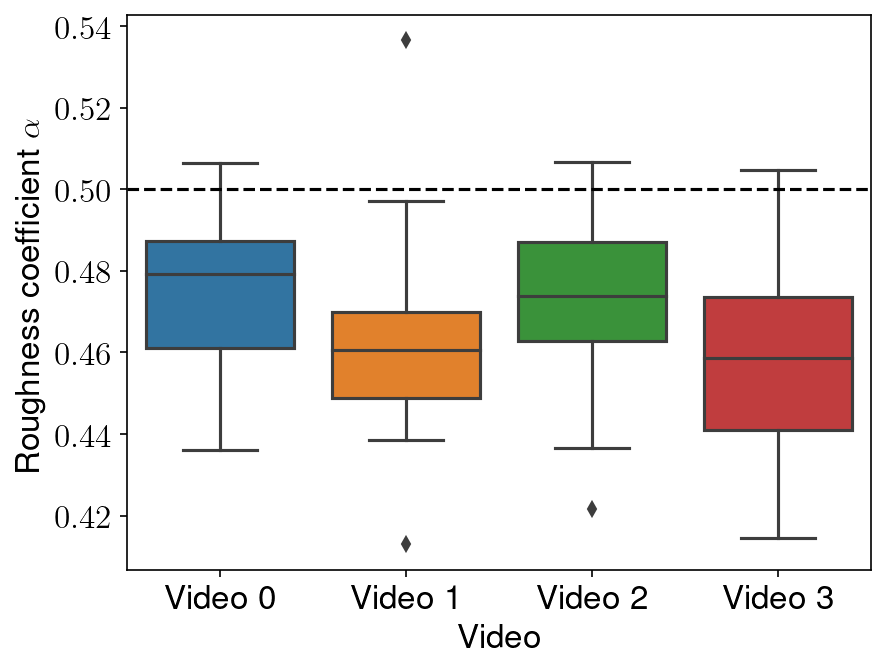

In [28]:
## Overall roughness (all times merged)
fig, ax = plt.subplots(dpi=150)
sns.boxplot(data=df, x="Video", y="alpha", ax=ax)
ax.plot([-0.5, 3.5], [0.5, 0.5], 'k--')
ax.set_xlim([-0.5, 3.5])
ax.set_ylabel("Roughness coefficient $\\alpha$")
#fig.savefig( os.path.join(save_folder_figures, 'Roughness_by_video_barplot.pdf') )
fig.show()

#### Roughness time dependence

In [29]:
# Fit linear function through time data
fit_params_all = np.zeros(( N_videos, 2));

for i in range(N_videos):
    x_data = df.loc[df["Video"] == "Video "+str(i)]['hours']
    y_data = df.loc[df["Video"] == "Video "+str(i)]['alpha']
    x_data = sm.add_constant(x_data)
    model = sm.OLS(y_data, x_data)
    results = model.fit()
    print('Fit parameters:', results.params )
    fit_params_all[i, :] = results.params.values
    

Fit parameters: const    0.475847
hours   -0.000537
dtype: float64
Fit parameters: const    0.458672
hours    0.001106
dtype: float64
Fit parameters: const    0.479742
hours   -0.001813
dtype: float64
Fit parameters: const    0.464805
hours   -0.002247
dtype: float64


In [39]:
df

,t,Video,alpha,hours
0,0,Video 0,0.466475,0.000000
1,0,Video 1,0.457737,0.000000
2,0,Video 2,0.487166,0.000000
3,0,Video 3,0.467218,0.000000
4,1,Video 0,0.506323,0.166667
...,...,...,...,...
143,35,Video 3,0.448125,5.833333
144,36,Video 0,0.440753,6.000000
145,36,Video 1,0.458057,6.000000
146,36,Video 2,0.478330,6.000000


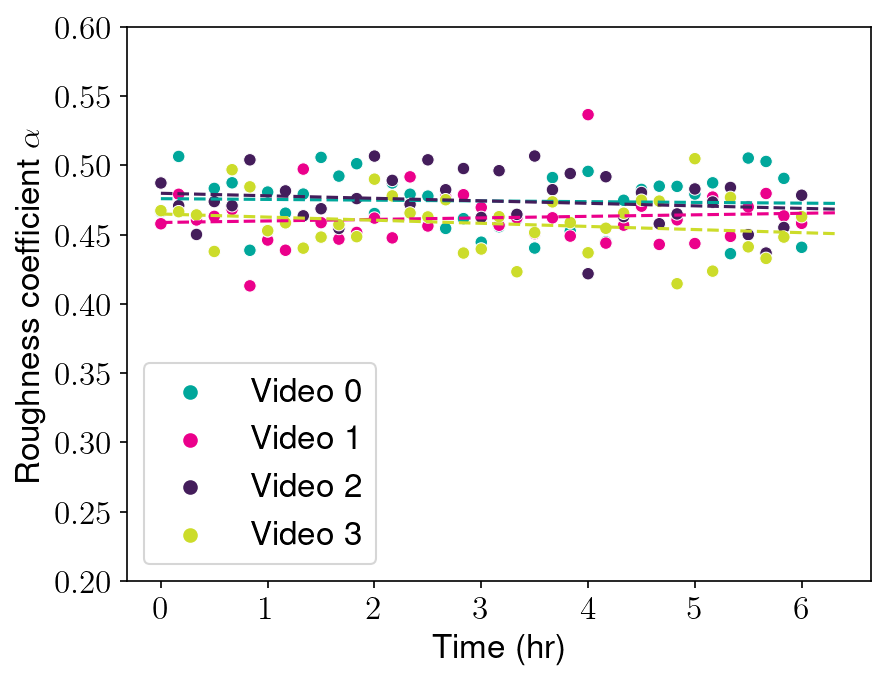

In [65]:
## Changes over time
#fig, ax = plt.subplots(2, 2, dpi=150)
colors = ["#00A79B", "#EB008B", "#441D5B", "#CCDC2A"]# Set your custom color palette

fig, ax = plt.subplots(dpi=150)
sns.scatterplot(data=df, x="hours", y="alpha", hue="Video") #, row="Video")
sns.set_palette(sns.color_palette(colors))
ax.set_xlabel('Time (hr)')
ax.set_ylabel("Roughness coefficient $\\alpha$")

for i in range(N_videos):
    x_vals = np.arange(0, t_max/6+1/6, 1/6)
    y_vals = fit_params_all[i, 0] + fit_params_all[i, 1]*x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.ylim(0.2, 0.6)
    plt.legend(loc='best')

#fig.savefig( os.path.join(save_folder_figures, 'Roughness_by_time_video_scatter_lin_fit_colors2.pdf') )
#fig.show()

In [31]:
## Calculate correlation over time
norm_data = pd.DataFrame([])
norm_data['time'] = df['t'];
norm_data['alpha_norm'] = (df['alpha'] - np.mean(df['alpha']))/np.std(df['alpha'])
print("overall correlation =", norm_data.corr(method="spearman").iloc[0,1] )

## Correlation for each data set 
corr_all = np.zeros(N_videos);
for i in range(N_videos):
    df_filt = df[(df['Video']=='Video '+str(i))]
    norm_data['time'] = df_filt['t'];
    norm_data['alpha_norm'] = (df_filt['alpha'] - np.mean(df_filt['alpha']))/np.std(df_filt['alpha'])
    corr_all[i] = norm_data.corr(method="spearman").iloc[0,1]
print("correlation per ds = ", corr_all )

overall correlation = -0.07883145647799282
correlation per ds =  [-0.02489331  0.06993836 -0.11664296 -0.19274538]


#### Statsmodels example for reference

In [ ]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
model

In [ ]:
results = model.fit()
results.params

In [ ]:
x_data = np.arange(0, 100);
y_data = results.params['const'] + results.params['education']*x_data

plt.figure()
plt.plot(x_data, y_data)
plt.scatter(X['education'], Y)

### Fit power law using scipy leastsq on non-transformed data

In [70]:
## Fit power law using scipy leastsq on non-transformed data
import scipy.optimize as optimize

def func(alpha, c, k):
    return c*k**(-(2*alpha+1))

k_all = np.arange(kmin, kmax)

alpha_guess = 0.5

alpha_fit_all = np.zeros( t_max );
for t in range(t_max):
    c = 1 #this_S_all_t[t, kmin] #np.repeat(this_S_all_t[t, kmin], data.shape[0] )
    data = this_S_all_t[t, kmin:kmax];
    
    def residuals(alpha, c, k, data):
        return data - func(alpha,c, k)

    alpha_fit,cov,infodict,mesg,ier = optimize.leastsq(residuals, alpha_guess, 
                                                       args=(c, k_all, data), full_output=True)
    
    alpha_fit_all[t] = alpha_fit;

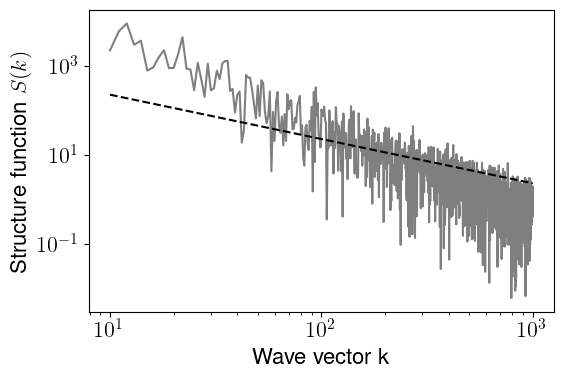

In [71]:
# Plot a single video to check
plt.figure(dpi=100)

t = 0;
alpha_fit = alpha_fit_all[t];
S_plot = this_S_all_t[t, kmin:kmax];

plt.plot(np.arange(kmin, kmax), S_plot, color=[0, t/t_max, 0, 0.5] )  
plt.plot(k_all, func(alpha_fit, S_plot[0], k_all), 'k--') # Plot power laws 

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

plt.show()

### Maximum likelihood estimate fitting
Or Bayesian fitting